# 18-Touch Locations

# Plotting the Touches of every Premier League team divided onto 3rds of the pitch
- Defensive 3rd 
- Middle 3rd 
- Attacking 3rd

## Data from FBref

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation
import matplotlib.patheffects as path_effects

from PIL import Image
import urllib
import os

# Get Data

In [2]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/touch.csv")


In [3]:
liga

Squad  Def 3rd  Mid 3rd  Att 3rd
0   Manchester City     1536     3587     1875
1           Arsenal     1346     2604     1768
2         Liverpool     1414     2692     1660
3     Newcastle Utd     1428     1939     1585
4           Chelsea     1319     2502     1550
5            Wolves     1858     2130     1421
6       Aston Villa     1507     2295     1264
7       Southampton     1366     1922     1256
8    Leicester City     1764     2661     1244
9          Brighton     1346     1705     1192
10        Brentford     1564     1873     1094
11     Leeds United     1403     1978     1065
12   Manchester Utd     1421     1779     1052
13         West Ham     1545     1744     1036
14        Tottenham     2035     2089     1030
15          Everton     1712     1802     1020
16           Fulham     1432     1788      999
17  Nott'ham Forest     1675     1910      950
18   Crystal Palace     1613     1651      790
19      Bournemouth     1790     1562      732

# Planning the plot

In [5]:
# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

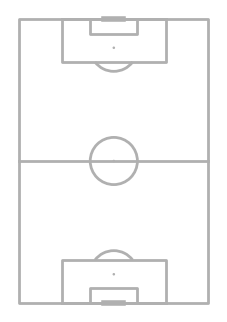

In [6]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)

pitch = VerticalPitch()

pitch.draw(ax = ax)

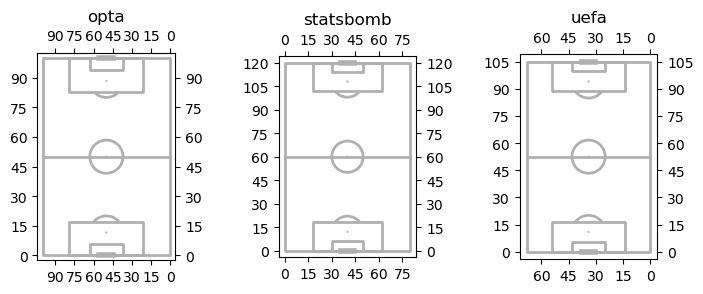

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (8,5), dpi = 100)

providers = ["opta", "statsbomb", "uefa"]
for index, ax in enumerate(axes.flat):
    pitch = VerticalPitch(
        pitch_type = providers[index], 
        axis = True, 
        label = True, 
        tick = True
    )
    pitch.draw(ax = ax)

    # So we can view more ticks in the chart
    ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

    ax.set_title(providers[index])

plt.subplots_adjust(wspace = 0.75)

# We will use the uefa pitch 105 wide and 68 long


In [109]:
def soc_pitch_divisions(ax, grids = False):
    '''
    This function returns a vertical football pitch
    divided in specific locations.

    Args:
        ax (obj): a matplotlib axes.
        grids (bool): should we draw the grid lines?
    '''

    # Notice the extra parameters passed to the object
    pitch = VerticalPitch(
        pitch_type = "uefa",
        half = False,
        goal_type='box',
        linewidth = 1.25,
        line_color='black'
    )

    pitch.draw(ax = ax)

    # Where we'll draw the lines
    if grids:
        y_lines = [105 - 35*x for x in range(1,3)]
        for j in y_lines:
            ax.plot(
                [68, 0], [j, j],
                color = "black", 
                ls = "--",
                lw = 1.5,
                zorder = 4
            )

    return ax

<AxesSubplot:>

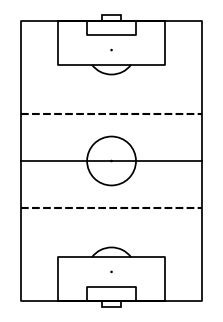

In [110]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)

soc_pitch_divisions(ax, grids = True)

####  How to plot every team's data one by one by creating a function

In [38]:
 a =liga.iloc[0,:]

In [40]:
a

Squad      Manchester City
Def 3rd               1536
Mid 3rd               3587
Att 3rd               1875
Name: 0, dtype: object

In [39]:
a[0]

'Manchester City'

In [42]:
a[2] # Mid 3rd value

3587

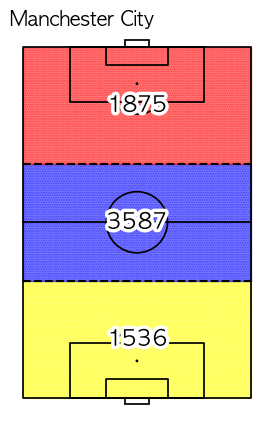

In [163]:
fig = plt.figure(figsize = (5,5), dpi = 100)
ax = plt.subplot(111)

soc_pitch_divisions(ax, grids = True)


a =liga.iloc[0,:]

ax.fill_between(
        x=[0,68], y1=[0], y2=[105/3],
        color=("yellow"), alpha=0.5, zorder=0,
        hatch="......."
    )

ax.fill_between(
        x=[0,68], y1=[105/3], y2=[105/3*2],
        color="blue", alpha=0.5, zorder=0,
        hatch="......."
    )
ax.fill_between(
        x=[0,68], y1=[105/3*2], y2=[105/3*3],
        color="red", alpha=0.5, zorder=0,
        hatch="......."
    )
ax.set_title(a[0], font="AppleGothic",size=14,loc = 'left')


i = 1
for j in range(1,6,2):
    text_ = ax.annotate(
        xy = (34,105-(105/6)*(6-j)),
        text = f"{a[i]}",ha = "center",
        va = "center", color = "black", size = 16,weight = "bold",
        zorder = 3,fontname="AppleGothic",fontweight="bold"
        )
    text_.set_path_effects(
            [path_effects.Stroke(linewidth=5, foreground="white"), path_effects.Normal()]
        )
    i = i+1
    
    


## Create function

In [224]:
def soc_touch_plota(ax,grids,a):
    fig = plt.figure(figsize = (5,5), dpi = 100)

    soc_pitch_divisions(ax, grids = True)
    ax.fill_between(
        x=[0,68], y1=[0], y2=[105/3],
        color=("yellow"), alpha=0.5, zorder=0,
        hatch="......."
    )

    ax.fill_between(
        x=[0,68], y1=[105/3], y2=[105/3*2],
        color="blue", alpha=0.5, zorder=0,
        hatch="......."
    )
    ax.fill_between(
        x=[0,68], y1=[105/3*2], y2=[105/3*3],
        color="red", alpha=0.5, zorder=0,
        hatch="......."
    )
    ax.set_title(a[0], font="AppleGothic",size=14,loc = 'left')


    i = 1
    for j in range(1,6,2):
        text_ = ax.annotate(
        xy = (34,105-(105/6)*(6-j)),
        text = f"{a[i]}",ha = "center",
        va = "center", color = "black", size = 12,weight = "bold",
        zorder = 3,fontname="AppleGothic",fontweight="bold"
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=5, foreground="white"), path_effects.Normal()]
        )
        i = i+1


### Check function


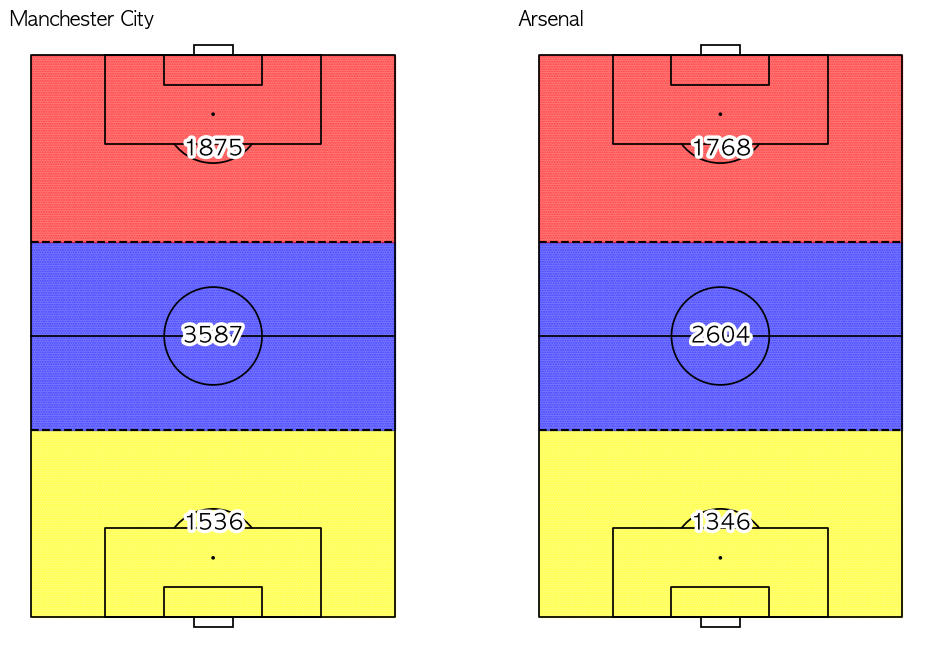

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [214]:
fig = plt.figure(figsize=(12, 8), dpi = 100)

ax_1 = plt.subplot(121)
ax_2 = plt.subplot(122)

soc_touch_plota(ax = ax_1,grids= False, a = liga.iloc[0,:])
soc_touch_plota(ax = ax_2,grids= False, a = liga.iloc[1,:])
    

# Final Plot

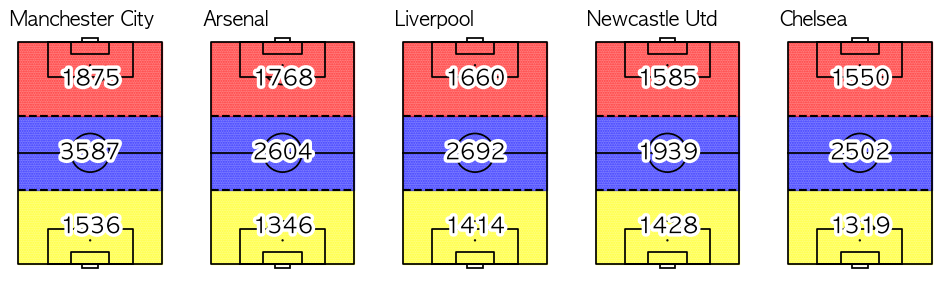

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [206]:
fig = plt.figure(figsize=(12, 8), dpi = 100)


list1 = []
ax_1 = plt.subplot(151)
list1.append(ax_1)
ax_2 = plt.subplot(152)
list1.append(ax_2)
ax_3 = plt.subplot(153)
list1.append(ax_3)
ax_4 = plt.subplot(154)
list1.append(ax_4)
ax_5 = plt.subplot(155)
list1.append(ax_5)


for i in range(0,5):
    a = liga.iloc[i,:]
    soc_touch_plota(ax = list1[i],grids= False, a =a)
    


#### Problem only 5 teams are plotted and we have 20 teams to plot

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_3666/3188678239.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (5,5), dpi = 100)


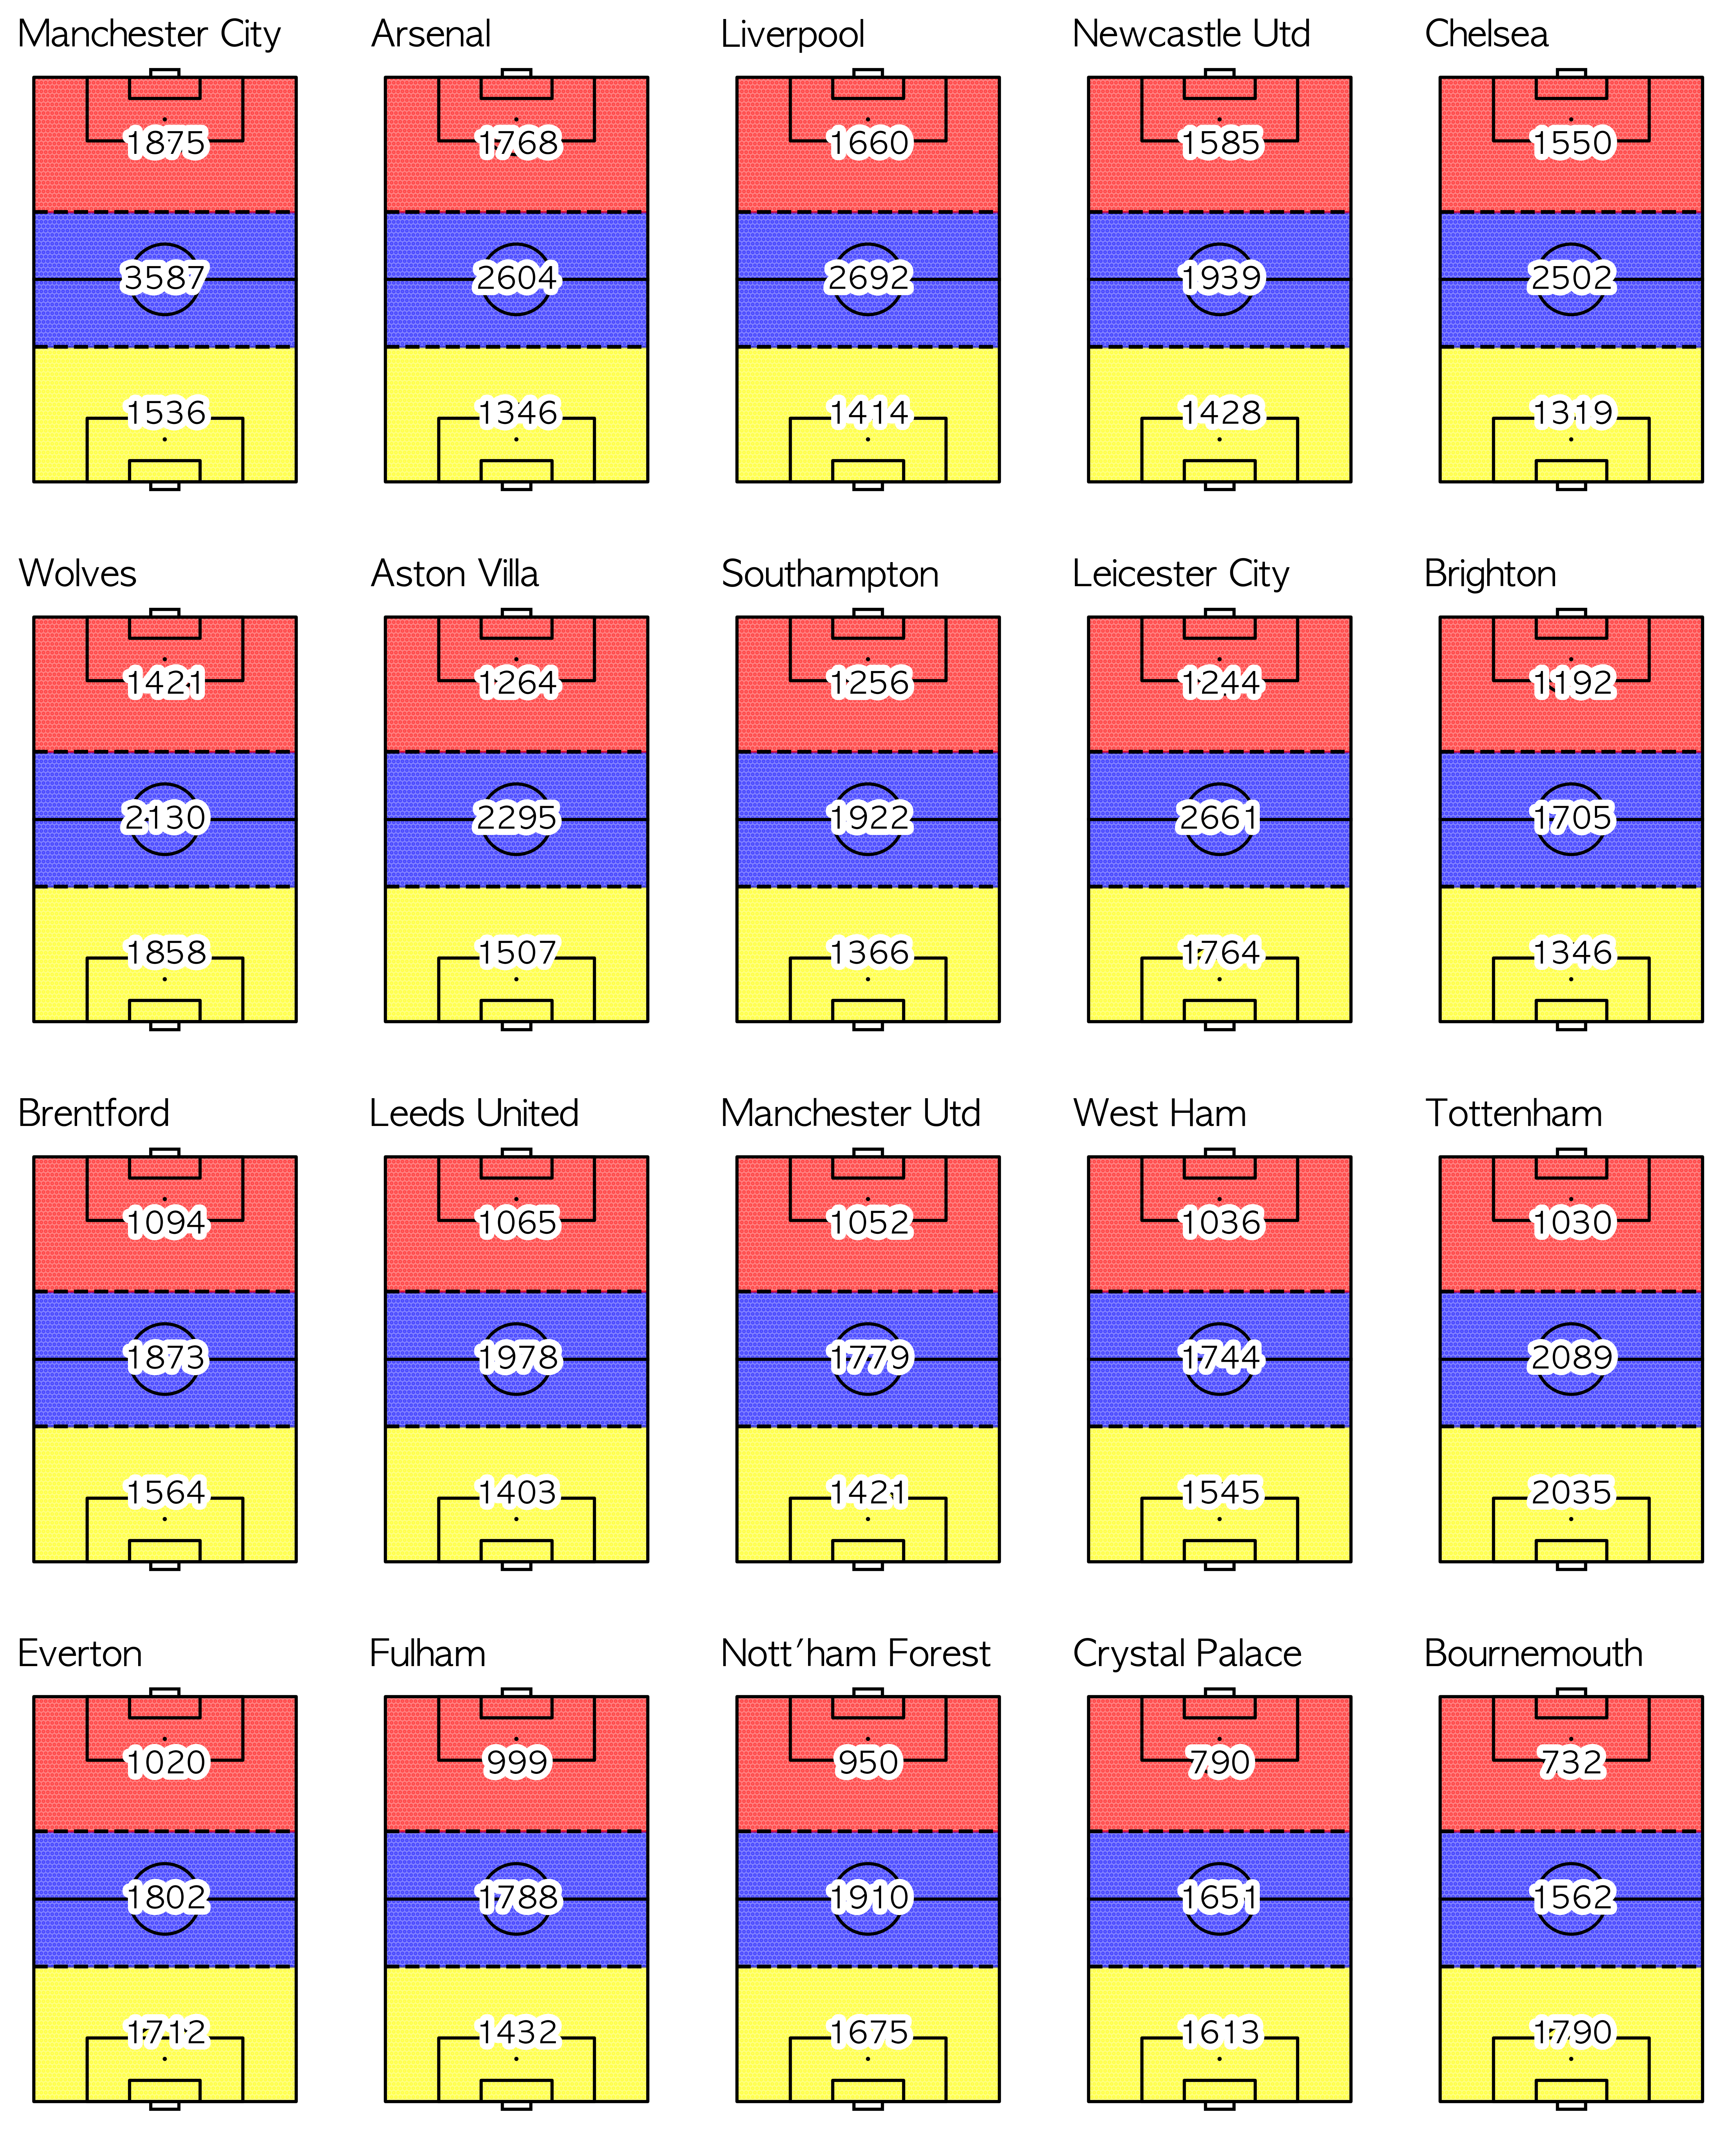

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [227]:
fig = plt.figure(figsize=(12,15), dpi=500)

list1 = []
for i in range(0,4):
    for j in range(0,5):
        ax_1 = plt.subplot2grid((4,5), (i,j))
        list1.append(ax_1)
for i in range(0,20):
    a = liga.iloc[i,:]
    soc_touch_plota(ax = list1[i],grids= False, a =a)

fig.savefig("AFC VS ARS.jpg")